In [1]:
############################################################################
################       █████   █████████  ███████████       ################ 
################      ░░███   ███░░░░░███░█░░░███░░░█       ################ 
################       ░███  ███     ░░░ ░   ░███  ░        ################ 
################       ░███ ░███             ░███           ################ 
################       ░███ ░███             ░███           ################ 
################       ░███ ░░███     ███    ░███           ################ 
################       █████ ░░█████████     █████          ################ 
################       ░░░░░   ░░░░░░░░░     ░░░░░          ################ 
############################################################################
########                 LOAD EQUIVALENCY FACTORS                 ##########
################           Project: R27-252 EV             #################
########          Originally written by: Johann Cardenas         ###########
############################################################################

# Created on Tue Aug 20 16:05:00 2024
# Last modified on Tue Ago 20 21:00:00 2024
# @author: Johann-Cardenas

In [1]:
L = 4.0   # Distance between outer axles of any load group (in ft.)
N = 2.0   # Number of axles in the load group

In [6]:
# SINGLE AXLE  18 000 lbs
Ws = 18000   # in lbs

# TANDEM AXLE  32 000 lbs
Wt = 500 * (L * N / (N - 1) + 12 * N + 36)  # in lbs
Wt

34000.0

## **Extrapolating Responses**

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy.interpolate import interp1d

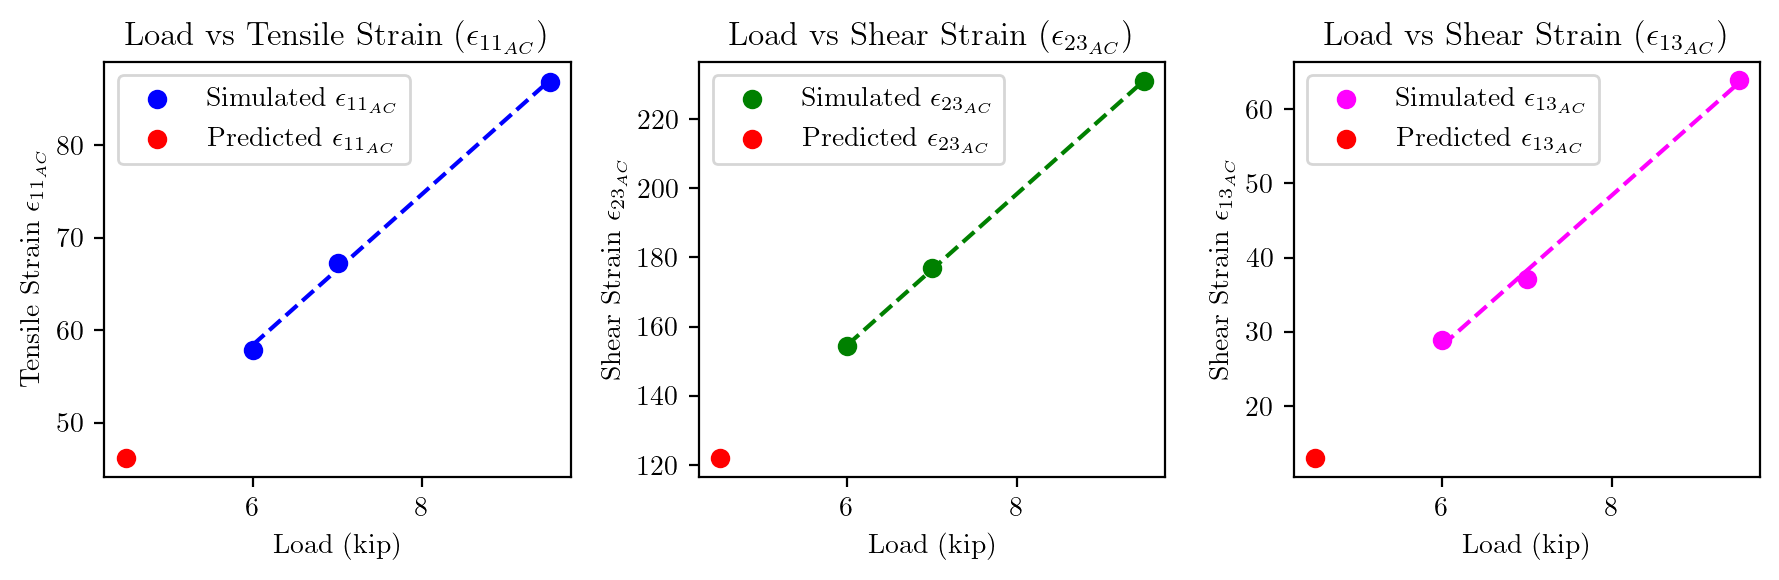

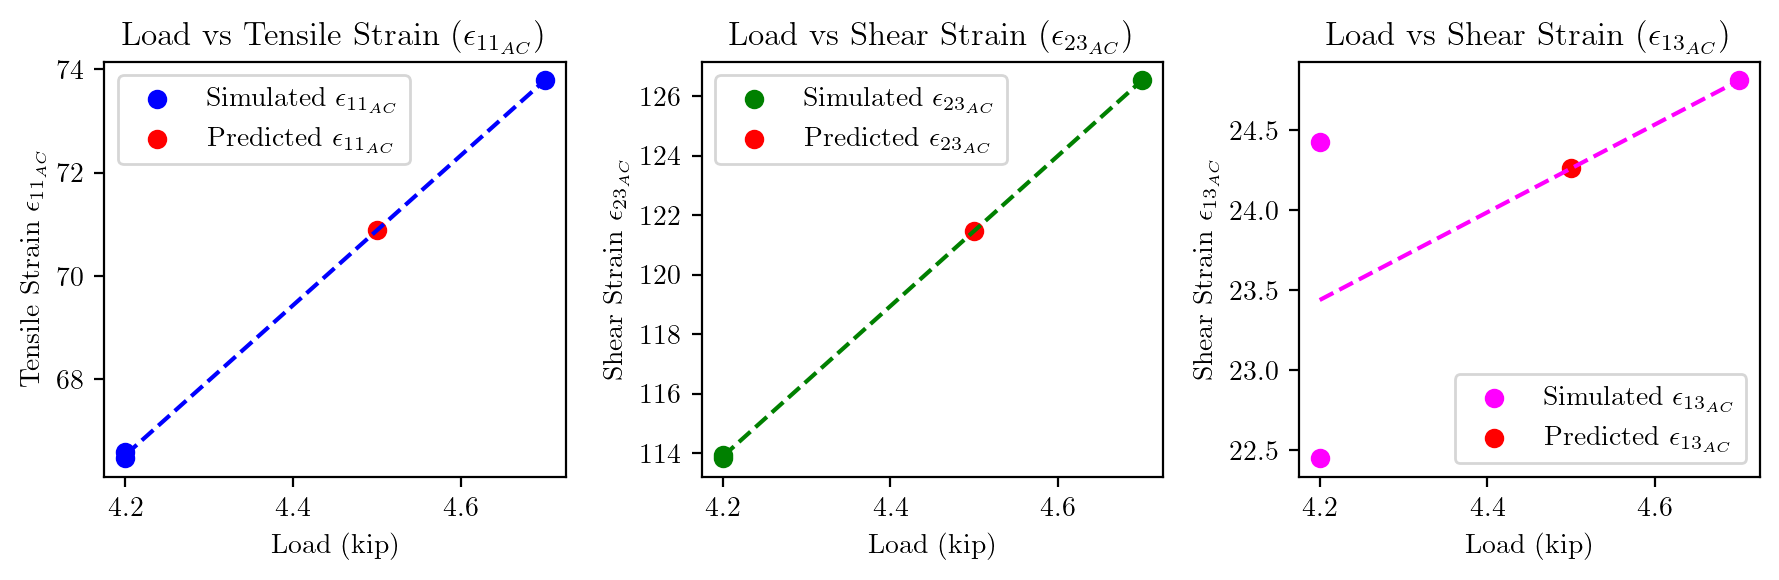

In [24]:
data_with_labels = {
    "Label": ["ST", "ST", "ST", "DTA", "DTA", "DTA"],
    "Load": [6.0, 7.0, 9.5, 4.2, 4.2, 4.7],
    "e11_HMA": [57.9243, 67.2787, 86.8035, 66.4725, 66.5973, 73.7862],
    "e23_HMA": [154.492, 176.7875, 231.048, 113.8235, 113.929, 126.532],
    "e13_HMA": [28.9568, 37.09325, 63.8575, 24.4287, 22.4484, 24.81245]
}

# Convert to DataFrame
df_labeled = pd.DataFrame(data_with_labels)

# Separate the data into ST and DTA
df_st = df_labeled[df_labeled['Label'] == 'ST']
df_dta = df_labeled[df_labeled['Label'] == 'DTA']

# Linear Regression model
model = LinearRegression()

# Prepare the prediction function
def predict_values(df):
    predictions = {}
    X = np.array(df['Load']).reshape(-1, 1)
    for column in ['e11_HMA', 'e23_HMA', 'e13_HMA']:
        y = np.array(df[column])
        model.fit(X, y)
        predictions[column] = model.predict(np.array([[4.5]]))[0]
    return predictions

# Predict for ST subset
predictions_st = predict_values(df_st)

# Predict for DTA subset
predictions_dta = predict_values(df_dta)

# Add predictions to the DataFrames
predicted_st = pd.DataFrame({
    "Label": ["ST"],
    "Load": [4.5],
    "e11_HMA": [predictions_st['e11_HMA']],
    "e23_HMA": [predictions_st['e23_HMA']],
    "e13_HMA": [predictions_st['e13_HMA']]
})

predicted_dta = pd.DataFrame({
    "Label": ["DTA"],
    "Load": [4.5],
    "e11_HMA": [predictions_dta['e11_HMA']],
    "e23_HMA": [predictions_dta['e23_HMA']],
    "e13_HMA": [predictions_dta['e13_HMA']]
})

# Combine the predictions with the original data
df_st_with_prediction = pd.concat([df_st, predicted_st], ignore_index=True)
df_dta_with_prediction = pd.concat([df_dta, predicted_dta], ignore_index=True)

# Function to plot with regression line
def plot_with_regression(df, prediction, label):
    plt.figure(figsize=(9, 3), dpi=200)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')
    
    # Plot e11 vs Load
    plt.subplot(1, 3, 1)
    plt.scatter(df['Load'], df['e11_HMA'], color='blue', label="Simulated $\\epsilon_{11_{AC}}$")
    plt.scatter(4.5, prediction['e11_HMA'], color='red', label="Predicted $\\epsilon_{11_{AC}}$")
    # Regression line
    model.fit(df[['Load']], df['e11_HMA'])
    plt.plot(df['Load'], model.predict(df[['Load']]), color='blue', linestyle='--')
    plt.xlabel("Load (kip)")
    plt.ylabel("Tensile Strain $\\epsilon_{11_{AC}}$")
    plt.title("Load vs Tensile Strain ($\\epsilon_{11_{AC}}$)")
    plt.legend()
    
    # Plot e23 vs Load
    plt.subplot(1, 3, 2)
    plt.scatter(df['Load'], df['e23_HMA'], color='green', label="Simulated $\\epsilon_{23_{AC}}$")
    plt.scatter(4.5, prediction['e23_HMA'], color='red', label="Predicted $\\epsilon_{23_{AC}}$")
    # Regression line
    model.fit(df[['Load']], df['e23_HMA'])
    plt.plot(df['Load'], model.predict(df[['Load']]), color='green', linestyle='--')
    plt.xlabel("Load (kip)")
    plt.ylabel("Shear Strain $\\epsilon_{23_{AC}}$")
    plt.title("Load vs Shear Strain ($\\epsilon_{23_{AC}}$)")
    plt.legend()
    
    # Plot e13 vs Load
    plt.subplot(1, 3, 3)
    plt.scatter(df['Load'], df['e13_HMA'], color='magenta', label="Simulated $\\epsilon_{13_{AC}}$")
    plt.scatter(4.5, prediction['e13_HMA'], color='red', label="Predicted $\\epsilon_{13_{AC}}$")
    # Regression line
    model.fit(df[['Load']], df['e13_HMA'])
    plt.plot(df['Load'], model.predict(df[['Load']]), color='magenta', linestyle='--')
    plt.xlabel("Load (kip)")
    plt.ylabel("Shear Strain $\\epsilon_{13_{AC}}$")
    plt.title("Load vs Shear Strain ($\\epsilon_{13_{AC}}$)")
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Plot for ST subset
plot_with_regression(df_st, predictions_st, "ST")

# Plot for DTA subset
plot_with_regression(df_dta, predictions_dta, "DTA")


In [41]:
predictions_dta

{'e11_HMA': 70.88567999999998,
 'e23_HMA': 121.46969999999997,
 'e13_HMA': 24.26289}

### **Rutting**

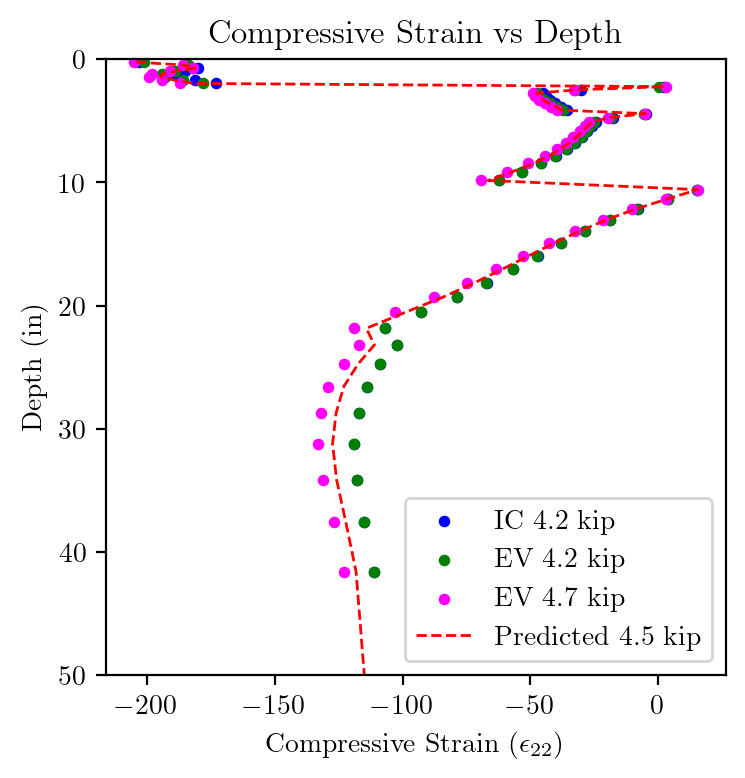

In [48]:
depth = [
    0.24015748, 0.480314961, 0.724409449, 0.972440945, 1.216535433, 1.464566929,
    1.716535433, 1.968503937, 2.228346457, 2.488188976, 2.751968504, 3.023622047,
    3.295275591, 3.570866142, 3.850393701, 4.133858268, 4.421259843, 4.736220472,
    5.078740157, 5.448818898, 5.850393701, 6.291338583, 6.763779528, 7.283464567,
    7.846456693, 8.456692913, 9.122047244, 9.842519685, 10.58661417, 11.37007874,
    12.19685039, 13.06299213, 13.97637795, 14.93700787, 15.9488189, 17.01181102,
    18.12992126, 19.30708661, 20.54724409, 21.8503937, 23.18503937, 24.74409449,
    26.57086614, 28.71259843, 31.21653543, 34.1496063, 37.58267717, 41.6023622,
    196.8503937
]

load_4_2_1 = [
    -2.03e-04, -1.84e-04, -1.80e-04, -1.85e-04, -1.89e-04, -1.87e-04,
    -1.81e-04, -1.73e-04, 2.14e-06, -3.02e-05, -4.50e-05, -4.41e-05,
    -4.25e-05, -4.05e-05, -3.79e-05, -3.58e-05, -4.77e-06, -1.77e-05,
    -2.45e-05, -2.60e-05, -2.78e-05, -2.99e-05, -3.25e-05, -3.59e-05,
    -4.01e-05, -4.58e-05, -5.33e-05, -6.24e-05, 1.53e-05, 3.80e-06,
    -8.14e-06, -1.88e-05, -2.86e-05, -3.79e-05, -4.72e-05, -5.68e-05,
    -6.71e-05, -7.89e-05, -9.28e-05, -1.07e-04, -1.02e-04, -1.09e-04,
    -1.14e-04, -1.17e-04, -1.19e-04, -1.18e-04, -1.15e-04, -1.11e-04,
    -5.49e-05
]

load_4_2_2 = [
    -2.01e-04, -1.84e-04, -1.82e-04, -1.89e-04, -1.94e-04, -1.93e-04,
    -1.86e-04, -1.78e-04, 3.99e-07, -3.26e-05, -4.76e-05, -4.65e-05,
    -4.47e-05, -4.24e-05, -3.95e-05, -3.72e-05, -5.50e-06, -1.85e-05, 
    -2.52e-05,
    -2.67e-05, -2.83e-05, -3.04e-05, -3.29e-05, -3.61e-05, -4.03e-05,
    -4.59e-05, -5.34e-05, -6.25e-05, 1.53e-05, 3.70e-06, -8.25e-06,
    -1.89e-05, -2.87e-05, -3.80e-05, -4.73e-05, -5.68e-05, -6.72e-05,
    -7.89e-05, -9.28e-05, -1.07e-04, -1.02e-04, -1.09e-04, -1.14e-04,
    -1.17e-04, -1.19e-04, -1.18e-04, -1.15e-04, -1.11e-04, -5.49e-05
]

load_4_7 = [
    -2.05e-04, -1.86e-04, -1.82e-04, -1.91e-04, -1.98e-04, -1.99e-04,
    -1.94e-04, -1.87e-04, 2.85e-06, -3.28e-05, -4.92e-05, -4.83e-05,
    -4.67e-05, -4.45e-05, -4.18e-05, -3.95e-05, -5.29e-06, -1.96e-05,
    -2.71e-05, -2.88e-05, -3.08e-05, -3.32e-05, -3.61e-05, -3.98e-05,
    -4.45e-05, -5.08e-05, -5.92e-05, -6.93e-05, 1.54e-05, 2.82e-06, 
    -1.02e-05,
    -2.18e-05, -3.25e-05, -4.27e-05, -5.28e-05, -6.33e-05, -7.47e-05,
    -8.76e-05, -1.03e-04, -1.19e-04, -1.17e-04, -1.23e-04, -1.29e-04,
    -1.32e-04, -1.33e-04, -1.31e-04, -1.27e-04, -1.23e-04, -6.09e-05
]

# Interpolation to predict values for load 4.5
interp_4_5 = interp1d([4.2, 4.7], [load_4_2_1, load_4_7], axis=0)
predicted_load_4_5 = interp_4_5(4.5)

# Plotting e22 vs Depth with inverted Y-axis
plt.figure(figsize=(4, 4), dpi=200)
plt.rc('text', usetex=True)
plt.rc('font', family='serif')

plt.scatter(np.array(load_4_2_1) * 1e6, depth, color='blue', label="IC 4.2 kip", s=10)
plt.scatter(np.array(load_4_2_2) * 1e6, depth, color='green', label="EV 4.2 kip", s=10)
plt.scatter(np.array(load_4_7) * 1e6, depth, color='magenta', label="EV 4.7 kip", s=10)

# Adding the predicted values for Load 4.5
plt.plot(np.array(predicted_load_4_5) * 1e6, depth, color='red', label="Predicted 4.5 kip", linestyle='--', linewidth=1)
plt.ylim(0, 50)

# Invert Y-axis
plt.gca().invert_yaxis()

# Labels and Title
plt.xlabel("Compressive Strain ($\\epsilon_{22}$)")
plt.ylabel("Depth (in)")
plt.title("Compressive Strain vs Depth")
plt.legend()

plt.show()

In [42]:
np.array(predicted_load_4_5)

array([-2.042e-04, -1.852e-04, -1.812e-04, -1.886e-04, -1.944e-04,
       -1.942e-04, -1.888e-04, -1.814e-04,  2.566e-06, -3.176e-05,
       -4.752e-05, -4.662e-05, -4.502e-05, -4.290e-05, -4.024e-05,
       -3.802e-05, -5.082e-06, -1.884e-05, -2.606e-05, -2.768e-05,
       -2.960e-05, -3.188e-05, -3.466e-05, -3.824e-05, -4.274e-05,
       -4.880e-05, -5.684e-05, -6.654e-05,  1.536e-05,  3.212e-06,
       -9.376e-06, -2.060e-05, -3.094e-05, -4.078e-05, -5.056e-05,
       -6.070e-05, -7.166e-05, -8.412e-05, -9.892e-05, -1.142e-04,
       -1.110e-04, -1.174e-04, -1.230e-04, -1.260e-04, -1.274e-04,
       -1.258e-04, -1.222e-04, -1.182e-04, -5.850e-05])

## **LEF**
From AASHTO, 1993

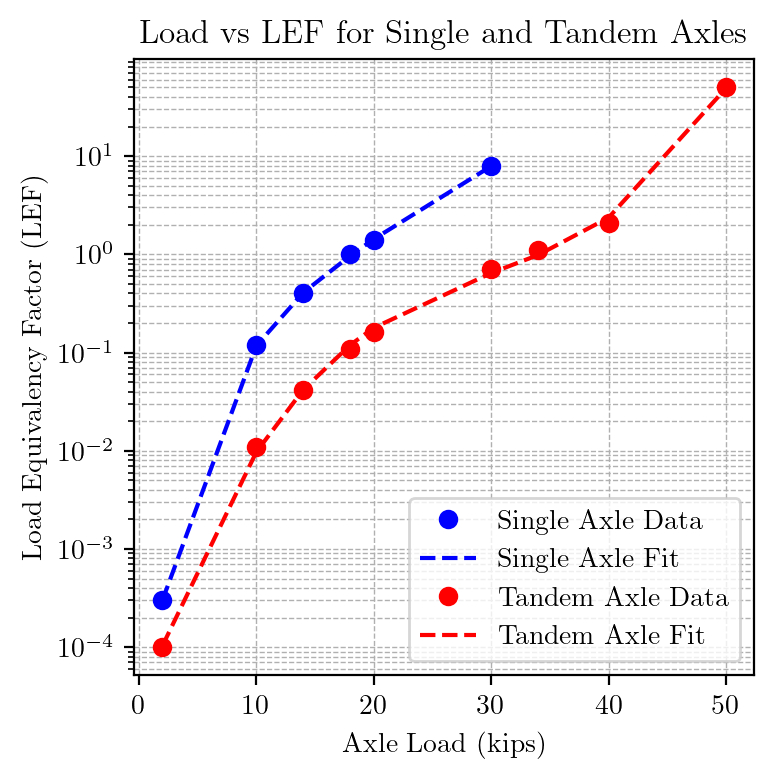

('log10(LEF) = -0.0000x⁴ + 0.0014x³ + -0.0432x² + 0.6940x + -4.7484',
 'log10(LEF) = 0.0000x⁴ + 0.0001x³ + -0.0101x² + 0.3550x + -4.6567')

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Data for Single Axle
single_axle_loads = np.array([2, 10, 14, 18, 20, 30])
single_axle_lef = np.array([0.0003, 0.118, 0.399, 1, 1.4, 7.9])

# Data for Tandem Axle
tandem_axle_loads = np.array([2, 10, 14, 18, 20, 30, 34, 40, 50])
tandem_axle_lef = np.array([0.0001, 0.011, 0.042, 0.109, 0.162, 0.703, 1.11, 2.06, 50.3])

# Define a 4th-degree polynomial function for curve fitting
def polynomial_4th(x, a, b, c, d, e):
    return a * x**4 + b * x**3 + c * x**2 + d * x + e

# Fixing the regression issue for tandem axle by using log-transformed values for fitting1
log_single_axle_lef = np.log10(single_axle_lef)
log_tandem_axle_lef = np.log10(tandem_axle_lef)

# Fit the data for Single Axle with a 4th degree polynomial
popt_single, _ = curve_fit(polynomial_4th, single_axle_loads, log_single_axle_lef)
single_axle_fit_log = polynomial_4th(single_axle_loads, *popt_single)
single_axle_fit = 10**single_axle_fit_log  # Convert back to the original scale

# Fit the data for Tandem Axle with a 4th degree polynomial using log-transformed LEF values
popt_tandem, _ = curve_fit(polynomial_4th, tandem_axle_loads, log_tandem_axle_lef)
tandem_axle_fit_log = polynomial_4th(tandem_axle_loads, *popt_tandem)
tandem_axle_fit = 10**tandem_axle_fit_log  # Convert back to the original scale

# Plotting with log scale on Y-axis
plt.figure(figsize=(4, 4), dpi=200)
plt.rc('font', family='serif')
plt.plot(single_axle_loads, single_axle_lef, 'bo', label='Single Axle Data')
plt.plot(single_axle_loads, single_axle_fit, 'b--', label=f'Single Axle Fit')
plt.plot(tandem_axle_loads, tandem_axle_lef, 'ro', label='Tandem Axle Data')
plt.plot(tandem_axle_loads, tandem_axle_fit, 'r--', label=f'Tandem Axle Fit')

plt.yscale('log')
plt.xlabel('Axle Load (kips)')
plt.ylabel('Load Equivalency Factor (LEF)')
plt.title('Load vs LEF for Single and Tandem Axles')
plt.legend()
plt.grid(True, which="both", ls="--", lw=0.5)
plt.show()

# Final regression equations
single_axle_eq = f"log10(LEF) = {popt_single[0]:.4f}x⁴ + {popt_single[1]:.4f}x³ + {popt_single[2]:.4f}x² + {popt_single[3]:.4f}x + {popt_single[4]:.4f}"
tandem_axle_eq = f"log10(LEF) = {popt_tandem[0]:.4f}x⁴ + {popt_tandem[1]:.4f}x³ + {popt_tandem[2]:.4f}x² + {popt_tandem[3]:.4f}x + {popt_tandem[4]:.4f}"

single_axle_eq, tandem_axle_eq

In [13]:
# Predict LEF for the following tandem loads: 29, 34, 38
tandem_loads = np.array([29, 34, 38])
tandem_loads_log = polynomial_4th(tandem_loads, *popt_tandem)
tandem_lef_predictions = 10**tandem_loads_log
tandem_lef_predictions


array([0.58257194, 0.98415377, 1.67686423])

In [23]:
# Predict LEF for the following single axle loads: 20, 24, 28, 38
single_loads = np.array([20, 24, 28, 32])
single_loads_log = polynomial_4th(single_loads, *popt_single)
single_lef_predictions = 10**single_loads_log
single_lef_predictions

array([1.42668018, 3.07781358, 6.17861219, 8.79575077])

## **ESALs-Based CDW**

## **Regression Analysis**

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder

# Creating the DataFrame
data = {
    'CaseName': ['FD_P1_SL0', 'FD_P1_SL2', 'FD_P5_SL0', 'FD_P5_SL3', 'FD_P3_SL0', 'FD_P2_SL0', 'FD_P2_SL2', 'FD_P6_SL0', 'FD_P6_SL6', 'FD_P4_SL0', 'FD_P4_SL6'],
    'Tire Type': ['ST', 'ST', 'ST', 'ST', 'ST', 'DTA', 'DTA', 'DTA', 'DTA', 'DTA', 'DTA'],
    'Load (kip)': [6.00, 6.00, 7.00, 7.00, 9.50, 4.20, 4.20, 4.20, 4.20, 4.70, 4.70],
    'Slip Ratio': ['0%', '2%', '0%', '3%', '0%', '0%', '2%', '0%', '6%', '0%', '6%'],
    'e11-HMA': [57.9243, 56.652, 67.2787, 65.0506, 86.8035, 66.4725, 65.739, 66.5973, 64.9395, 73.7862, 71.7091],
    'e23-HMA': [154.492, 155.507, 176.7875, 171.6585, 231.048, 113.8235, 115.629, 113.929, 107.222, 126.532, 120.189],
    'e13-HMA': [28.9568, 79.9135, 37.09325, 103.3405, 63.8575, 24.4287, 53.933, 22.4484, 64.8305, 24.81245, 72.3455],
    'e22-HMA1': [[-2.98E-04, -2.79E-04, -2.63E-04, -2.54E-04, -2.47E-04, -2.39E-04, -2.31E-04, -2.24E-04],
                 [-3.08E-04, -2.92E-04, -2.72E-04, -2.57E-04, -2.44E-04, -2.32E-04, -2.21E-04, -2.11E-04],
                 [-2.87E-04, -2.68E-04, -2.53E-04, -2.46E-04, -2.41E-04, -2.37E-04, -2.34E-04, -2.31E-04],
                 [-2.88E-04, -2.80E-04, -2.64E-04, -2.51E-04, -2.41E-04, -2.32E-04, -2.24E-04, -2.18E-04],
                 [-2.79E-04, -2.58E-04, -2.42E-04, -2.35E-04, -2.31E-04, -2.31E-04, -2.34E-04, -2.39E-04],
                 [-2.03E-04, -1.84E-04, -1.80E-04, -1.85E-04, -1.89E-04, -1.87E-04, -1.81E-04, -1.73E-04],
                 [-1.87E-04, -1.73E-04, -1.67E-04, -1.69E-04, -1.70E-04, -1.69E-04, -1.63E-04, -1.56E-04],
                 [-2.01E-04, -1.84E-04, -1.82E-04, -1.89E-04, -1.94E-04, -1.93E-04, -1.86E-04, -1.78E-04],
                 [-1.63E-04, -1.63E-04, -1.61E-04, -1.63E-04, -1.64E-04, -1.63E-04, -1.58E-04, -1.53E-04],
                 [-2.05E-04, -1.86E-04, -1.82E-04, -1.91E-04, -1.98E-04, -1.99E-04, -1.94E-04, -1.87E-04],
                 [-1.75E-04, -1.72E-04, -1.68E-04, -1.69E-04, -1.71E-04, -1.71E-04, -1.67E-04, -1.61E-04]],
    'e22-HMA2': [[-8.80E-06, -4.86E-05, -6.69E-05, -6.55E-05, -6.35E-05, -6.07E-05, -5.73E-05, -5.44E-05],
               [-6.00E-06, -4.33E-05, -6.05E-05, -5.93E-05, -5.75E-05, -5.51E-05, -5.22E-05, -4.98E-05],
               [-3.97E-06, -4.74E-05, -6.82E-05, -6.76E-05, -6.63E-05, -6.42E-05, -6.13E-05, -5.90E-05],
               [-3.21E-08, -4.07E-05, -6.00E-05, -5.94E-05, -5.83E-05, -5.66E-05, -5.43E-05, -5.25E-05],
               [1.00E-05, -3.93E-05, -6.39E-05, -6.50E-05, -6.54E-05, -6.50E-05, -6.38E-05, -6.31E-05],
               [2.14E-06, -3.02E-05, -4.50E-05, -4.41E-05, -4.25E-05, -4.05E-05, -3.79E-05, -3.58E-05],
               [6.75E-06, -2.38E-05, -3.84E-05, -3.81E-05, -3.72E-05, -3.58E-05, -3.39E-05, -3.23E-05],
               [3.99E-07, -3.26E-05, -4.76E-05, -4.65E-05, -4.47E-05, -4.24E-05, -3.95E-05, -3.72E-05],
               [7.82E-06, -2.25E-05, -3.71E-05, -3.70E-05, -3.62E-05, -3.50E-05, -3.32E-05, -3.17E-05],
               [2.85E-06, -3.28E-05, -4.92E-05, -4.83E-05, -4.67E-05, -4.45E-05, -4.18E-05, -3.95E-05],
               [9.83E-06, -2.28E-05, -3.85E-05, -3.86E-05, -3.79E-05, -3.67E-05, -3.50E-05, -3.36E-05]],
    'e22-HMA3': [[-1.25E-05, -2.88E-05, -3.64E-05, -3.70E-05, -3.76E-05, -3.84E-05, -3.97E-05, -4.17E-05, -4.48E-05, -4.95E-05, -5.68E-05, -6.64E-05],
               [-1.08E-05, -2.63E-05, -3.38E-05, -3.45E-05, -3.54E-05, -3.65E-05, -3.80E-05, -4.01E-05, -4.33E-05, -4.81E-05, -5.53E-05, -6.47E-05],
               [-1.29E-05, -3.14E-05, -4.04E-05, -4.13E-05, -4.24E-05, -4.37E-05, -4.55E-05, -4.80E-05, -5.19E-05, -5.76E-05, -6.62E-05, -7.74E-05],
               [-1.01E-05, -2.76E-05, -3.63E-05, -3.76E-05, -3.90E-05, -4.07E-05, -4.28E-05, -4.56E-05, -4.96E-05, -5.54E-05, -6.40E-05, -7.49E-05],
               [-1.07E-05, -3.36E-05, -4.54E-05, -4.77E-05, -5.02E-05, -5.29E-05, -5.63E-05, -6.07E-05, -6.65E-05, -7.47E-05, -8.65E-05, -1.01E-04],
               [-4.77E-06, -1.77E-05, -2.45E-05, -2.60E-05, -2.78E-05, -2.99E-05, -3.25E-05, -3.59E-05, -4.01E-05, -4.58E-05, -5.33E-05, -6.24E-05],
               [-3.34E-06, -1.60E-05, -2.27E-05, -2.45E-05, -2.64E-05, -2.87E-05, -3.15E-05, -3.49E-05, -3.93E-05, -4.49E-05, -5.24E-05, -6.14E-05],
               [-5.50E-06, -1.85E-05, -2.52E-05, -2.67E-05, -2.83E-05, -3.04E-05, -3.29E-05, -3.61E-05, -4.03E-05, -4.59E-05, -5.34E-05, -6.25E-05],
               [-3.12E-06, -1.57E-05, -2.24E-05, -2.42E-05, -2.61E-05, -2.84E-05, -3.12E-05, -3.45E-05, -3.88E-05, -4.44E-05, -5.19E-05, -6.07E-05],
               [-5.29E-06, -1.96E-05, -2.71E-05, -2.88E-05, -3.08E-05, -3.32E-05, -3.61E-05, -3.98E-05, -4.45E-05, -5.08E-05, -5.92E-05, -6.93E-05],
               [-2.86E-06, -1.65E-05, -2.39E-05, -2.60E-05, -2.83E-05, -3.09E-05, -3.40E-05, -3.79E-05, -4.27E-05, -4.89E-05, -5.72E-05, -6.70E-05]],
    'e22-BS': [[9.72E-06, -2.95E-06, -1.52E-05, -2.52E-05, -3.35E-05, -4.09E-05, -4.78E-05, -5.48E-05, -6.26E-05, -7.19E-05, -8.39E-05, -9.69E-05],
               [9.55E-06, -2.80E-06, -1.48E-05, -2.46E-05, -3.28E-05, -4.00E-05, -4.68E-05, -5.38E-05, -6.14E-05, -7.06E-05, -8.23E-05, -9.51E-05],
               [9.60E-06, -4.81E-06, -1.88E-05, -3.02E-05, -3.98E-05, -4.83E-05, -5.63E-05, -6.44E-05, -7.34E-05, -8.42E-05, -9.80E-05, -1.13E-04],
               [9.52E-06, -4.43E-06, -1.80E-05, -2.92E-05, -3.86E-05, -4.69E-05, -5.47E-05, -6.27E-05, -7.15E-05, -8.21E-05, -9.56E-05, -1.10E-04],
               [7.88E-06, -9.79E-06, -2.71E-05, -4.15E-05, -5.38E-05, -6.48E-05, -7.52E-05, -8.58E-05, -9.76E-05, -1.12E-04, -1.30E-04, -1.49E-04],
               [1.53E-05, 3.80E-06, -8.14E-06, -1.88E-05, -2.86E-05, -3.79E-05, -4.72E-05, -5.68E-05, -6.71E-05, -7.89E-05, -9.28E-05, -1.07E-04],
               [1.50E-05, 3.65E-06, -8.14E-06, -1.86E-05, -2.83E-05, -3.75E-05, -4.66E-05, -5.61E-05, -6.63E-05, -7.78E-05, -9.16E-05, -1.06E-04],
               [1.53E-05, 3.70E-06, -8.25E-06, -1.89E-05, -2.87E-05, -3.80E-05, -4.73E-05, -5.68E-05, -6.72E-05, -7.89E-05, -9.28E-05, -1.07E-04],
               [1.48E-05, 3.50E-06, -8.16E-06, -1.85E-05, -2.81E-05, -3.72E-05, -4.62E-05, -5.55E-05, -6.55E-05, -7.70E-05, -9.05E-05, -1.04E-04],
               [1.54E-05, 2.82E-06, -1.02E-05, -2.18E-05, -3.25E-05, -4.27E-05, -5.28E-05, -6.33E-05, -7.47E-05, -8.76E-05, -1.03E-04, -1.19E-04],
               [1.50E-05, 2.76E-06, -9.89E-06, -2.12E-05, -3.16E-05, -4.15E-05, -5.14E-05, -6.16E-05, -7.26E-05, -8.51E-05, -1.00E-04, -1.15E-04]],
    'e22-SG': [[-7.88E-05, -8.62E-05, -9.23E-05, -9.59E-05, -9.71E-05, -9.60E-05, -9.27E-05, -8.92E-05, -4.39E-05],
               [-7.74E-05, -8.46E-05, -9.07E-05, -9.42E-05, -9.54E-05, -9.43E-05, -9.11E-05, -8.77E-05, -4.32E-05],
               [-9.65E-05, -1.04E-04, -1.11E-04, -1.14E-04, -1.15E-04, -1.13E-04, -1.09E-04, -1.05E-04, -5.15E-05],
               [-9.40E-05, -1.02E-04, -1.08E-04, -1.11E-04, -1.12E-04, -1.10E-04, -1.06E-04, -1.02E-04, -5.02E-05],
               [-1.40E-04, -1.48E-04, -1.54E-04, -1.56E-04, -1.56E-04, -1.52E-04, -1.46E-04, -1.39E-04, -6.85E-05],
               [-1.02E-04, -1.09E-04, -1.14E-04, -1.17E-04, -1.19E-04, -1.18E-04, -1.15E-04, -1.11E-04, -5.49E-05],
               [-1.01E-04, -1.07E-04, -1.12E-04, -1.16E-04, -1.17E-04, -1.16E-04, -1.13E-04, -1.10E-04, -5.41E-05],
               [-1.02E-04, -1.09E-04, -1.14E-04, -1.17E-04, -1.19E-04, -1.18E-04, -1.15E-04, -1.11E-04, -5.49E-05],
               [-9.94E-05, -1.06E-04, -1.11E-04, -1.14E-04, -1.16E-04, -1.15E-04, -1.12E-04, -1.08E-04, -5.35E-05],
               [-1.17E-04, -1.23E-04, -1.29E-04, -1.32E-04, -1.33E-04, -1.31E-04, -1.27E-04, -1.23E-04, -6.09E-05],
               [-1.13E-04, -1.20E-04, -1.25E-04, -1.28E-04, -1.29E-04, -1.28E-04, -1.24E-04, -1.20E-04, -5.92E-05]]
}

df = pd.DataFrame(data)

In [37]:
# Convert 'Slip Ratio' to numerical by stripping '%' and converting to float
df['Slip Ratio'] = df['Slip Ratio'].str.rstrip('%').astype('float') / 100.0

# Encode 'Tire Type' as numerical values
label_encoder = LabelEncoder()
df['Tire Type'] = label_encoder.fit_transform(df['Tire Type'])

# Concatenate 'e22' inputs into a single array per row
df['e22'] = df.apply(lambda row: np.concatenate([row['e22-HMA1'], row['e22-HMA2'], row['e22-HMA3'], row['e22-BS'], row['e22-SG']]), axis=1)

# Split the dataset based on Tire Type
df_st = df[df['Tire Type'] == 1]  # Assuming 'ST' is encoded as 1
df_dta = df[df['Tire Type'] == 0]  # Assuming 'DTA' is encoded as 0

# Define the features for both datasets
features = ['Load (kip)', 'Slip Ratio']

# Initialize dictionaries to store models for both scalar and array predictions
models_st = {'e11-HMA': None, 'e23-HMA': None, 'e13-HMA': None, 'e22': None}
models_dta = {'e11-HMA': None, 'e23-HMA': None, 'e13-HMA': None, 'e22': None}

# Train models for scalar targets for ST
for target in ['e11-HMA', 'e23-HMA', 'e13-HMA']:
    X_st = df_st[features]
    y_st = df_st[target]
    
    model_st = LinearRegression()
    model_st.fit(X_st, y_st)
    
    models_st[target] = model_st

# Train model for concatenated e22 targets for ST
X_st = df_st[features]
y_st_e22 = np.array(df_st['e22'].tolist())  # Convert list of arrays into a 2D array

model_st_e22 = LinearRegression()
model_st_e22.fit(X_st, y_st_e22)

models_st['e22'] = model_st_e22

# Train models for scalar targets for DTA
for target in ['e11-HMA', 'e23-HMA', 'e13-HMA']:
    X_dta = df_dta[features]
    y_dta = df_dta[target]
    
    model_dta = LinearRegression()
    model_dta.fit(X_dta, y_dta)
    
    models_dta[target] = model_dta

# Train model for concatenated e22 targets for DTA
X_dta = df_dta[features]
y_dta_e22 = np.array(df_dta['e22'].tolist())  # Convert list of arrays into a 2D array

model_dta_e22 = LinearRegression()
model_dta_e22.fit(X_dta, y_dta_e22)

models_dta['e22'] = model_dta_e22

# Example predictions for new data
new_data_st = pd.DataFrame({'Load (kip)': [7.5], 'Slip Ratio': [0.02]})
new_data_dta = pd.DataFrame({'Load (kip)': [4.5], 'Slip Ratio': [0.05]})

# Predictions for ST tire type
predictions_st = {target: model.predict(new_data_st) for target, model in models_st.items()}
predictions_dta = {target: model.predict(new_data_dta) for target, model in models_dta.items()}

print("\nPredictions for ST tire type:", predictions_st)
print("Predictions for DTA tire type:", predictions_dta)


Predictions for ST tire type: {'e11-HMA': array([69.45993993]), 'e23-HMA': array([185.21446335]), 'e13-HMA': array([88.78945442]), 'e22': array([[-2.89866049e-04, -2.76567818e-04, -2.59605729e-04,
        -2.47729570e-04, -2.38629318e-04, -2.31476832e-04,
        -2.25935973e-04, -2.22135636e-04,  1.63588256e-06,
        -4.07205560e-05, -6.10706824e-05, -6.08379107e-05,
        -6.00240944e-05, -5.85602359e-05, -5.64591407e-05,
        -5.48615838e-05, -1.03933446e-05, -2.89903960e-05,
        -3.83224937e-05, -3.97766639e-05, -4.13929233e-05,
        -4.32592249e-05, -4.56056445e-05, -4.87097725e-05,
        -5.30572030e-05, -5.93321820e-05, -6.85434709e-05,
        -8.01506318e-05,  9.06638585e-06, -5.60334457e-06,
        -1.99070767e-05, -3.17193766e-05, -4.16928391e-05,
        -5.05240101e-05, -5.88525695e-05, -6.73836563e-05,
        -7.67786015e-05, -8.81622578e-05, -1.02554676e-04,
        -1.17929065e-04, -1.03543218e-04, -1.11362426e-04,
        -1.17416681e-04, -1.2022948

Plots for ST tire type:


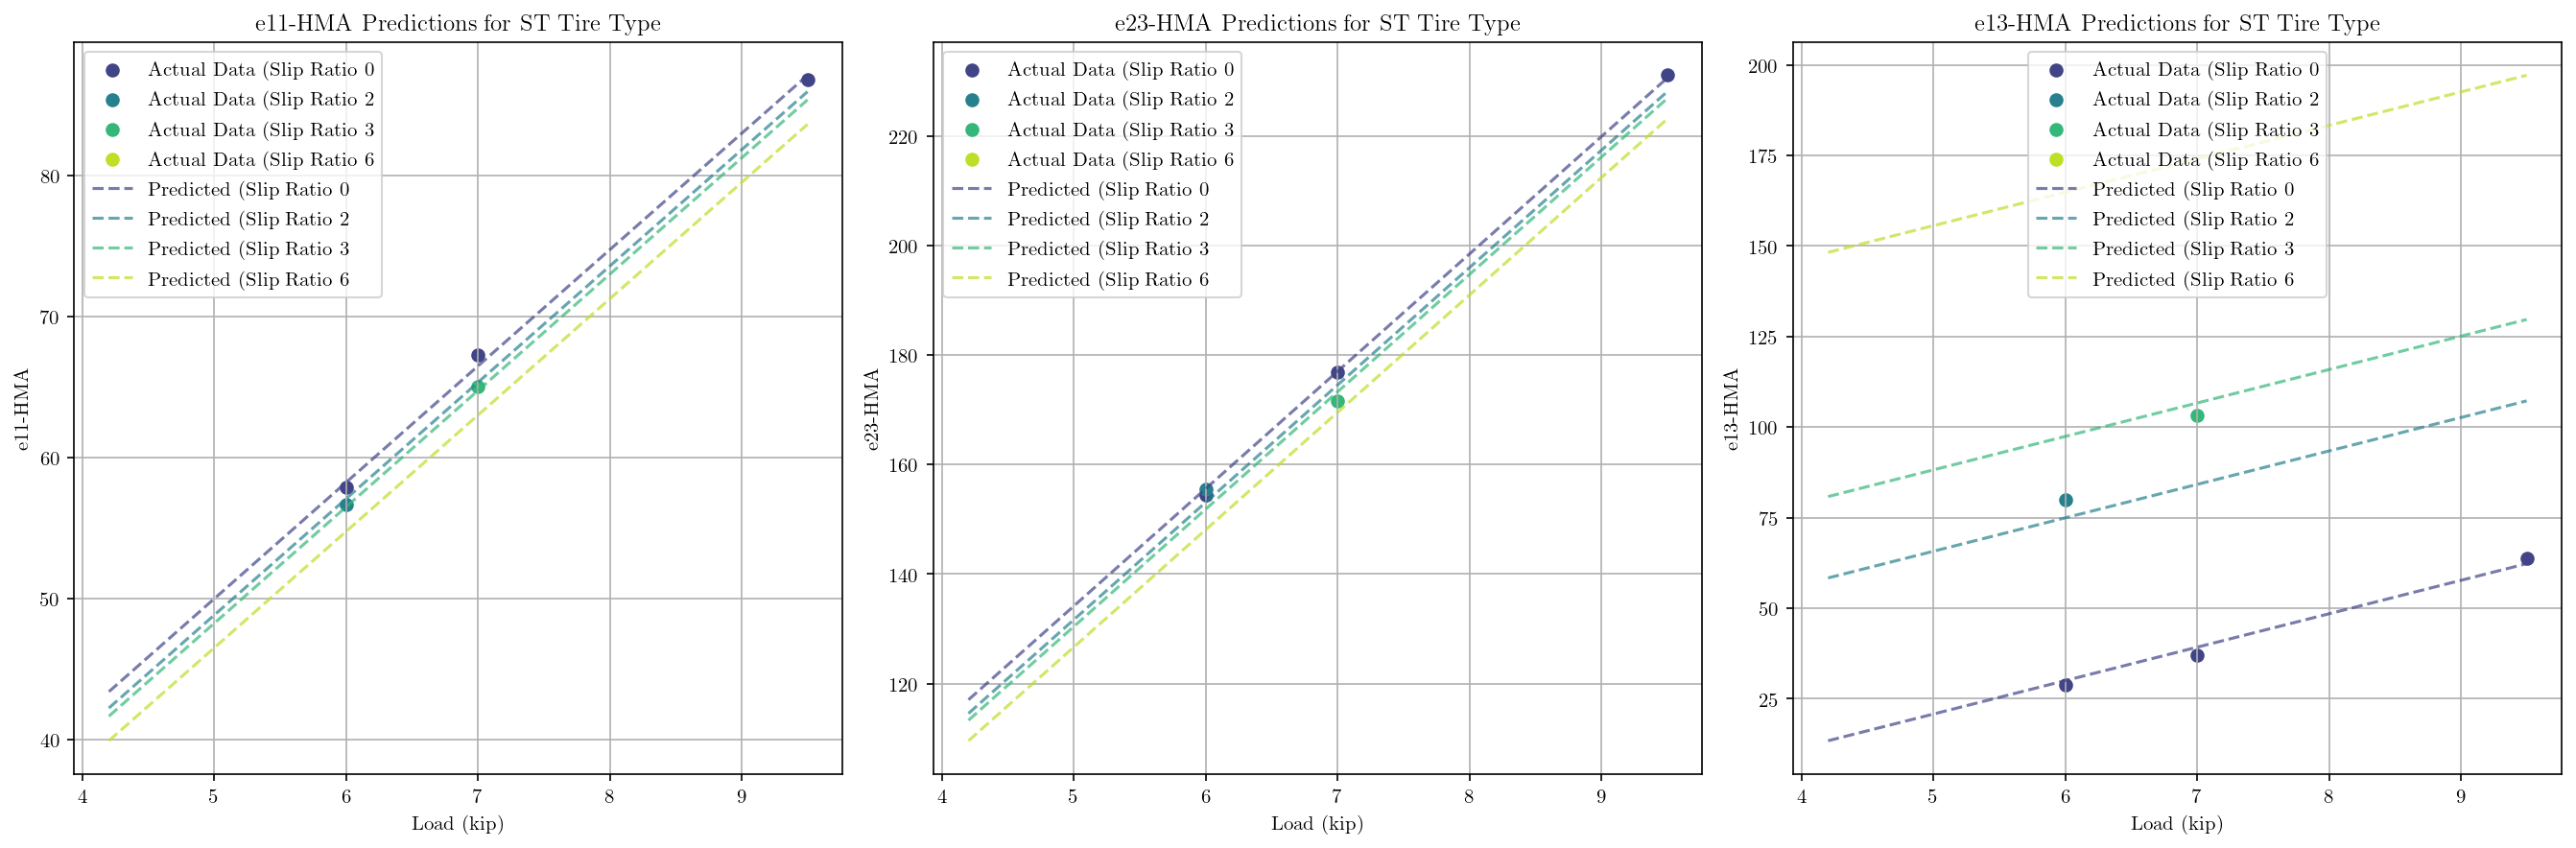

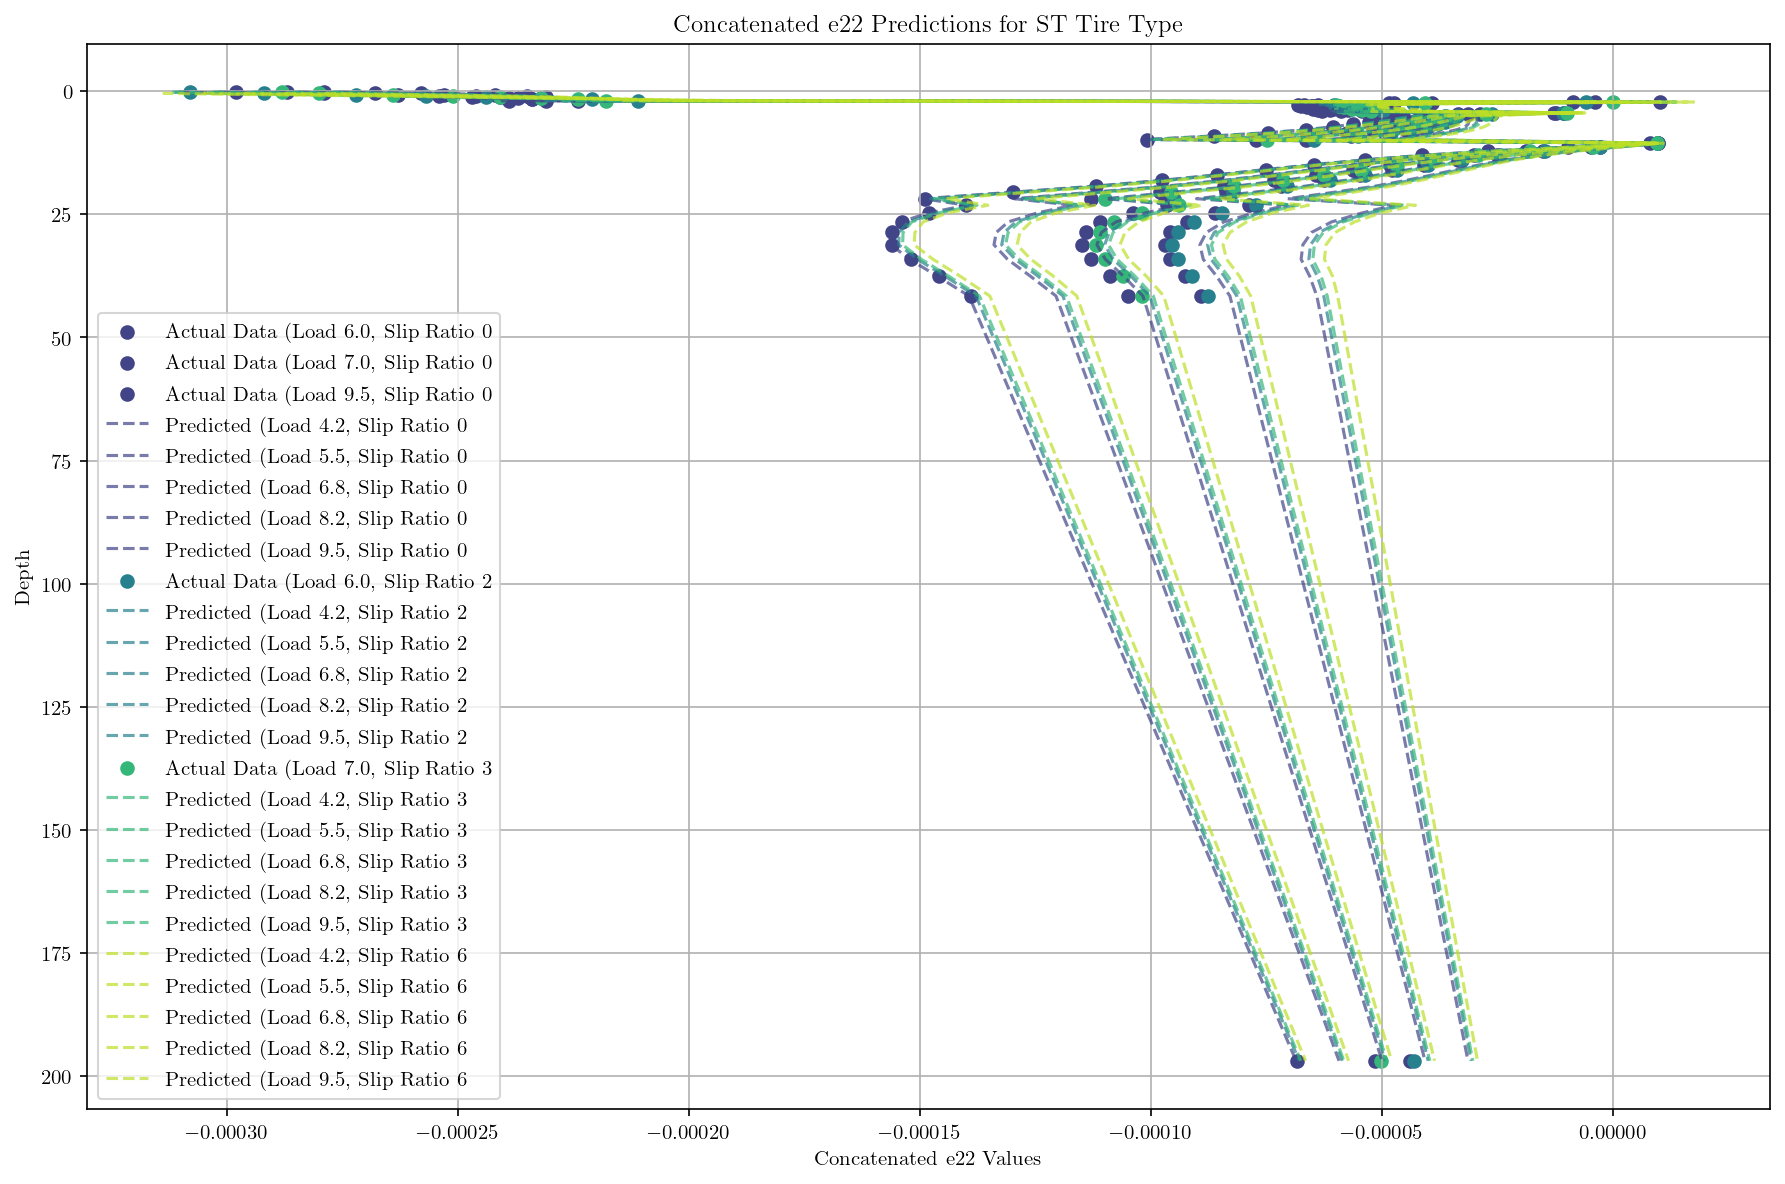

Plots for DTA tire type:


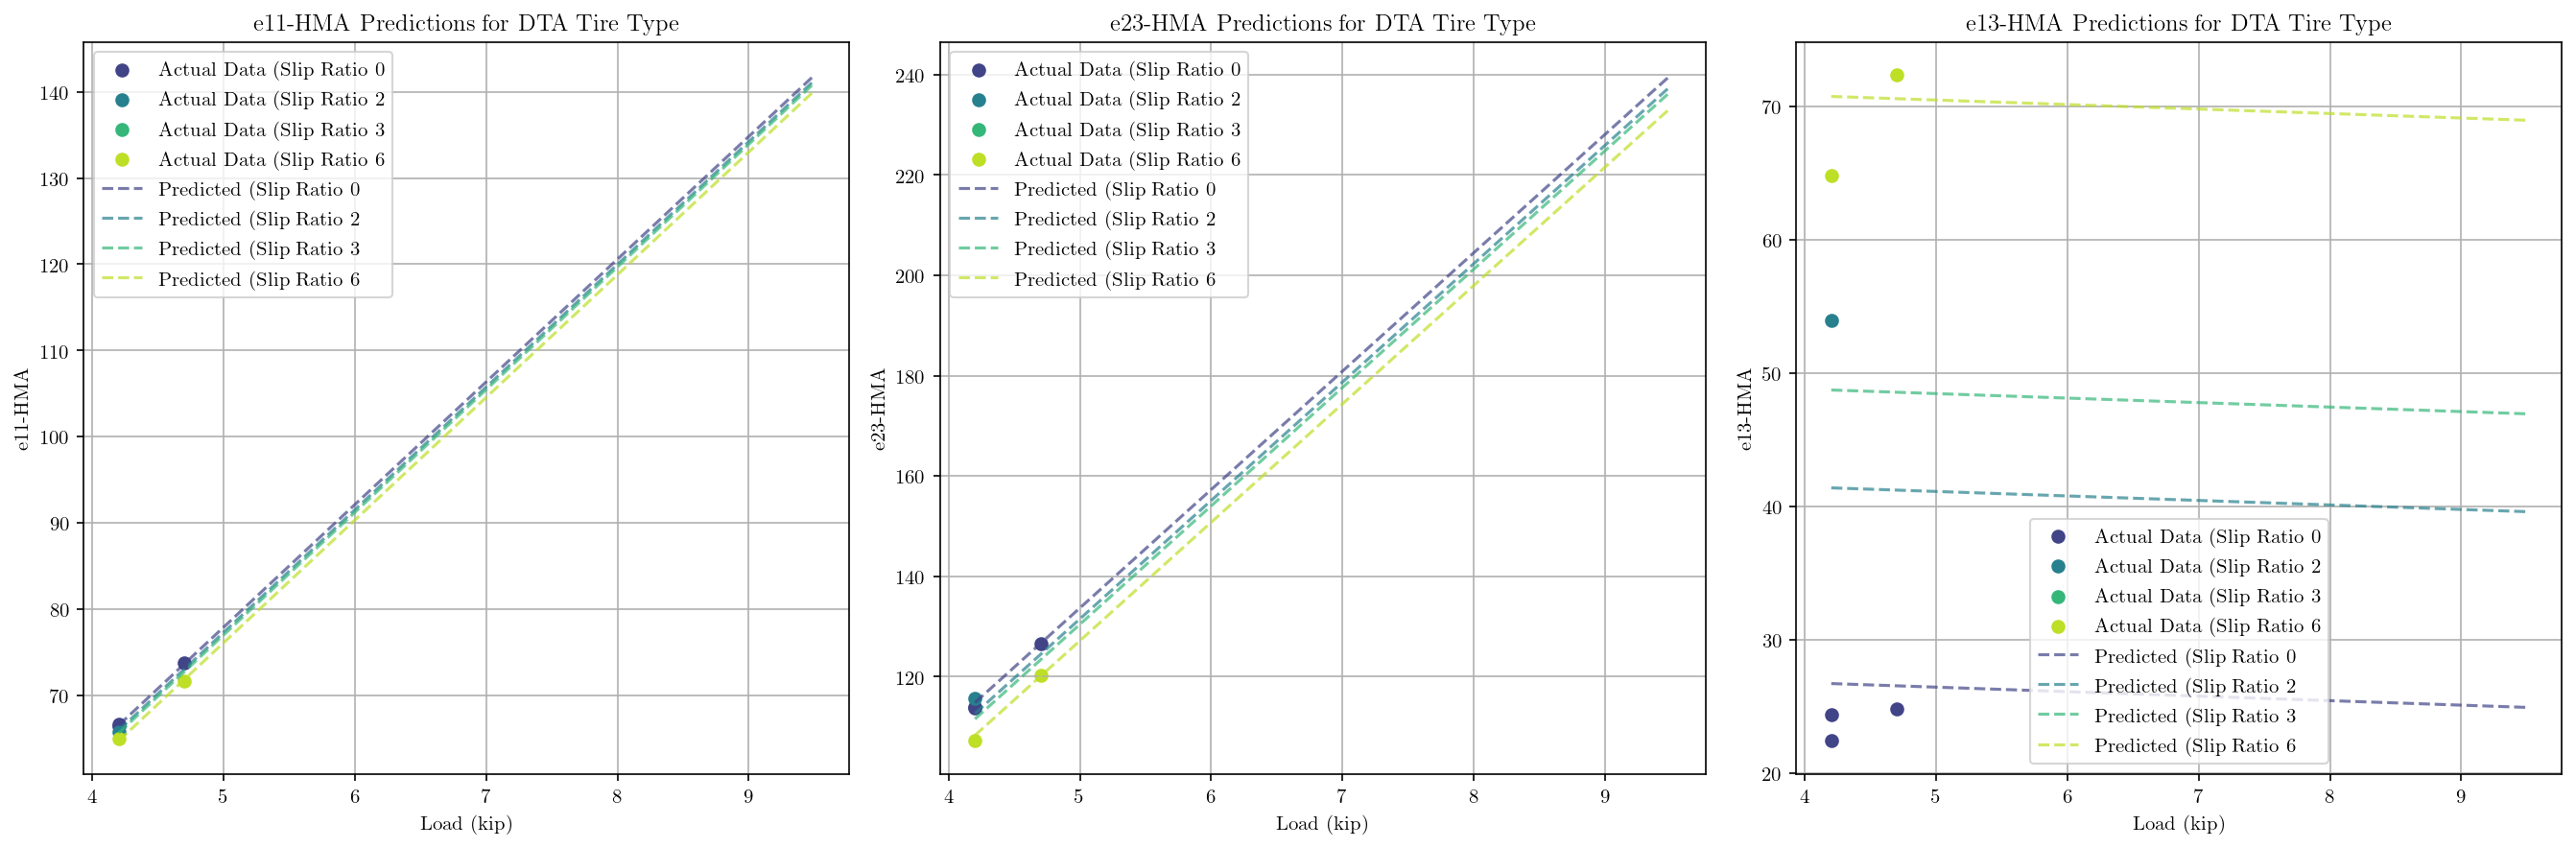

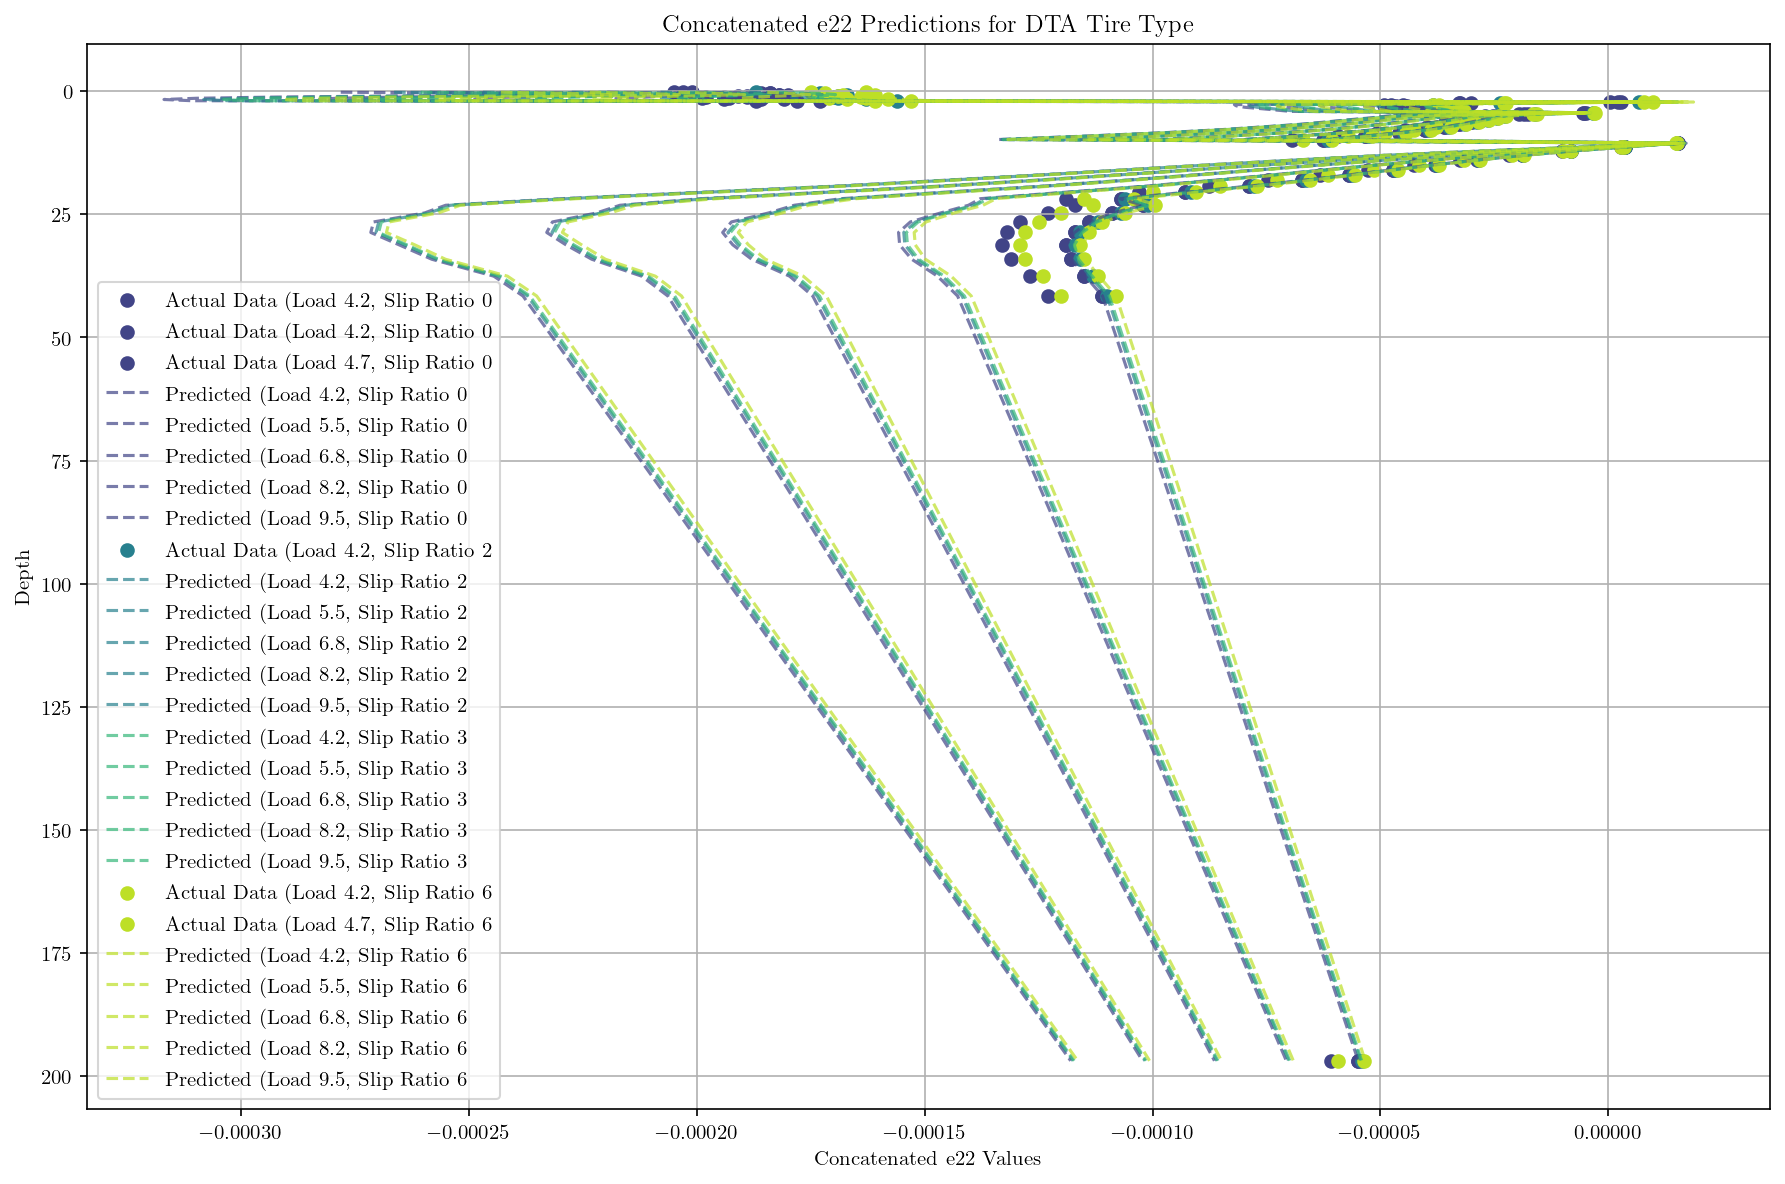

In [38]:
# Define a range of values for Load for prediction
load_range = np.linspace(df['Load (kip)'].min(), df['Load (kip)'].max(), 5)

# Unique slip ratios for differentiation
unique_slip_ratios = df['Slip Ratio'].unique()

# Define colors for plotting different slip ratios
colors = plt.cm.viridis(np.linspace(0.2, 0.9, len(unique_slip_ratios)))

# Depth vector for the Y-axis
depth = [
    0.24015748, 0.480314961, 0.724409449, 0.972440945, 1.216535433, 1.464566929,
    1.716535433, 1.968503937, 2.228346457, 2.488188976, 2.751968504, 3.023622047,
    3.295275591, 3.570866142, 3.850393701, 4.133858268, 4.421259843, 4.736220472,
    5.078740157, 5.448818898, 5.850393701, 6.291338583, 6.763779528, 7.283464567,
    7.846456693, 8.456692913, 9.122047244, 9.842519685, 10.58661417, 11.37007874,
    12.19685039, 13.06299213, 13.97637795, 14.93700787, 15.9488189, 17.01181102,
    18.12992126, 19.30708661, 20.54724409, 21.8503937, 23.18503937, 24.74409449,
    26.57086614, 28.71259843, 31.21653543, 34.1496063, 37.58267717, 41.6023622,
    196.8503937
]

def plot_predictions_separated_by_slip_ratio(models, df, tire_type_label):
    # Plot for e11-HMA, e23-HMA, and e13-HMA
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), dpi=150)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    for idx, target in enumerate(['e11-HMA', 'e23-HMA', 'e13-HMA']):
        ax = axes[idx]
        for slip_ratio, color in zip(unique_slip_ratios, colors):
            mask = df['Slip Ratio'] == slip_ratio
            ax.scatter(df.loc[mask, 'Load (kip)'], df.loc[mask, target], color=color, label=f'Actual Data (Slip Ratio {slip_ratio:.0%})')

        for slip_ratio, color in zip(unique_slip_ratios, colors):
            model = models[target]
            grid_data = pd.DataFrame({'Load (kip)': load_range, 'Slip Ratio': slip_ratio})
            predictions = model.predict(grid_data)
            ax.plot(load_range, predictions, color=color, linestyle='--', alpha=0.7, label=f'Predicted (Slip Ratio {slip_ratio:.0%})')

        ax.set_title(f'{target} Predictions for {tire_type_label} Tire Type')
        ax.set_xlabel('Load (kip)')
        ax.set_ylabel(target)
        ax.legend()
        ax.grid(True)
    
    plt.tight_layout()
    plt.show()

    # Plot for concatenated e22 array predictions
    plt.figure(figsize=(12, 8), dpi=150)
    plt.rc('text', usetex=True)
    plt.rc('font', family='serif')

    for slip_ratio, color in zip(unique_slip_ratios, colors):
        mask = df['Slip Ratio'] == slip_ratio

        # Concatenate all e22 actual values for each case
        for idx in mask[mask].index:
            actual_values_concat = np.concatenate([
                df.loc[idx, 'e22-HMA1'], df.loc[idx, 'e22-HMA2'], df.loc[idx, 'e22-HMA3'],
                df.loc[idx, 'e22-BS'], df.loc[idx, 'e22-SG']
            ])
            load_value = df.loc[idx, 'Load (kip)']  # Extract the load value for the legend
            plt.scatter(actual_values_concat, depth[:len(actual_values_concat)], color=color, label=f'Actual Data (Load {load_value:.1f}, Slip Ratio {slip_ratio:.0%})')

        # Predict concatenated e22 values for each combination of load and slip ratio
        grid_data = pd.DataFrame({'Load (kip)': load_range, 'Slip Ratio': slip_ratio})
        predictions_concat = models['e22'].predict(grid_data)

        # Plot predicted e22 values
        for i, load_value in enumerate(load_range):
            plt.plot(predictions_concat[i], depth[:len(predictions_concat[i])], color=color, linestyle='--', alpha=0.7, label=f'Predicted (Load {load_value:.1f}, Slip Ratio {slip_ratio:.0%})')

    plt.title(f'Concatenated e22 Predictions for {tire_type_label} Tire Type')
    plt.xlabel('Concatenated e22 Values')
    plt.ylabel('Depth')
    plt.gca().invert_yaxis()  # Invert Y-axis
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# Plot predictions for ST tire type
print("Plots for ST tire type:")
plot_predictions_separated_by_slip_ratio(models_st, df_st, 'ST')

# Plot predictions for DTA tire type
print("Plots for DTA tire type:")
plot_predictions_separated_by_slip_ratio(models_dta, df_dta, 'DTA')

In [40]:

# Define the load and slip ratio values
load_values = np.array([4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5])
slip_ratios = np.array([0.0, 0.02, 0.04, 0.06, 0.07])

# Create a grid of load and slip ratio values
load_grid, slip_ratio_grid = np.meshgrid(load_values, slip_ratios)
load_slip_data = np.array([load_grid.ravel(), slip_ratio_grid.ravel()]).T

# Initialize a dictionary to store all predictions
predictions_dict = {'ST': {}, 'DTA': {}}

# Predict e11-HMA, e23-HMA, and e13-HMA for ST tire type
for target in ['e11-HMA', 'e23-HMA', 'e13-HMA']:
    predictions_dict['ST'][target] = {}
    predictions_st_target = models_st[target].predict(load_slip_data)
    for i, (load, slip_ratio) in enumerate(zip(load_slip_data[:, 0], load_slip_data[:, 1])):
        predictions_dict['ST'][target][(load, slip_ratio)] = predictions_st_target[i]

# Predict concatenated e22 values for ST tire type
predictions_dict['ST']['e22'] = {}
predictions_st_e22 = models_st['e22'].predict(load_slip_data)
for i, (load, slip_ratio) in enumerate(zip(load_slip_data[:, 0], load_slip_data[:, 1])):
    predictions_dict['ST']['e22'][(load, slip_ratio)] = predictions_st_e22[i]

# Predict e11-HMA, e23-HMA, and e13-HMA for DTA tire type
for target in ['e11-HMA', 'e23-HMA', 'e13-HMA']:
    predictions_dict['DTA'][target] = {}
    predictions_dta_target = models_dta[target].predict(load_slip_data)
    for i, (load, slip_ratio) in enumerate(zip(load_slip_data[:, 0], load_slip_data[:, 1])):
        predictions_dict['DTA'][target][(load, slip_ratio)] = predictions_dta_target[i]

# Predict concatenated e22 values for DTA tire type
predictions_dict['DTA']['e22'] = {}
predictions_dta_e22 = models_dta['e22'].predict(load_slip_data)
for i, (load, slip_ratio) in enumerate(zip(load_slip_data[:, 0], load_slip_data[:, 1])):
    predictions_dict['DTA']['e22'][(load, slip_ratio)] = predictions_dta_e22[i]

# Print predictions for verification
print("\nPredictions for ST tire type:")
for key in predictions_dict['ST']:
    print(key, predictions_dict['ST'][key])

print("\nPredictions for DTA tire type:")
for key in predictions_dict['DTA']:
    print(key, predictions_dict['DTA'][key])



Predictions for ST tire type:
e11-HMA {(4.0, 0.0): 41.76136663858468, (4.5, 0.0): 45.88402097725359, (5.0, 0.0): 50.00667531592251, (5.5, 0.0): 54.129329654591416, (6.0, 0.0): 58.251983993260325, (6.5, 0.0): 62.37463833192924, (7.0, 0.0): 66.49729267059814, (7.5, 0.0): 70.61994700926707, (8.0, 0.0): 74.74260134793597, (8.5, 0.0): 78.86525568660488, (9.0, 0.0): 82.98791002527379, (9.5, 0.0): 87.11056436394271, (4.0, 0.02): 40.60135956192083, (4.5, 0.02): 44.72401390058973, (5.0, 0.02): 48.84666823925865, (5.5, 0.02): 52.96932257792756, (6.0, 0.02): 57.091976916596465, (6.5, 0.02): 61.21463125526538, (7.0, 0.02): 65.3372855939343, (7.5, 0.02): 69.4599399326032, (8.0, 0.02): 73.58259427127211, (8.5, 0.02): 77.70524860994102, (9.0, 0.02): 81.82790294860993, (9.5, 0.02): 85.95055728727885, (4.0, 0.04): 39.44135248525697, (4.5, 0.04): 43.56400682392588, (5.0, 0.04): 47.686661162594795, (5.5, 0.04): 51.809315501263704, (6.0, 0.04): 55.93196983993261, (6.5, 0.04): 60.05462417860153, (7.0, 0.0

c:\Users\johannc2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johannc2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johannc2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johannc2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Users\johannc2\AppData\Local\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
c:\Us

In [54]:
# Using values to calculate Number of repetitions
from scipy.optimize import minimize_scalar

## BOTTOM UP FATIGUE CRACKING
E_HMA = 1465.52 *145.037738  # psi
VMA, VFA = 13.7, 61.4 
H_HMA = 10.00 # inches
e_11 = predictions_dict['ST']['e11-HMA'][(9.5, 0.00)] * 1E-06

def BUFC_Nf(e_11, E_HMA, VMA, VFA, H_HMA):
    # Constants
    k_f1 = 0.007566
    k_f2 = -3.9492
    k_f3 = -1.281
    beta_f1 = 1.00
    beta_f2 = 1.00
    beta_f3 = 1.00
    
    V_a = (VMA * (1 - VFA / 100))/100
    V_be = (V_a * VFA / 100)/(1 - VFA / 100)

    M = 4.84 * (V_be / (V_a + V_be) - 0.69)
    C = 10**M
    C_H = 1 / (0.000398 + 0.003602 / (1 + np.exp(11.02 - 3.49 * H_HMA)))

    # Calculate N_f
    N_f = k_f1 * C * C_H * beta_f1 * (e_11**(k_f2 * beta_f2)) * (E_HMA**(k_f3 * beta_f3))
    
    return int(N_f)

N_BUFC = BUFC_Nf(e_11, E_HMA, VMA, VFA, H_HMA)


## TOP-DOWN CRACKING

def TDFCS_Nf(e_23, E_HMA, VMA, VFA, H_HMA):
    # Constants
    k_f1 = 0.007566
    k_f2 = -3.9492
    k_f3 = -1.281
    beta_f1 = 1.00
    beta_f2 = 1.00
    beta_f3 = 1.00
    
    V_a = (VMA * (1 - VFA / 100))/100
    V_be = (V_a * VFA / 100)/(1 - VFA / 100)

    M = 4.84 * (V_be / (V_a + V_be) - 0.69)
    C = 10**M
    C_H = 1 / (0.01 + 12.00 / (1 + np.exp(15.676 - 2.816 * H_HMA)))

    # Calculate N_f
    N_f = k_f1 * C * C_H * beta_f1 * (e_23**(k_f2 * beta_f2)) * (E_HMA**(k_f3 * beta_f3))
    
    return int(N_f)

e_23 = predictions_dict['ST']['e23-HMA'][(9.5, 0.00)] * 1E-06
E_HMA = 1461.89 *145.037738  # psi
VMA, VFA = 13.7, 61.4 
H_HMA = 10.00 # inches

N_TDFCS = TDFCS_Nf(e_23, E_HMA, VMA, VFA, H_HMA)

# SHOVING
def Shoving_AC(e12, T, Thicks, H_HMA, Shov_tol=0.50):
    # Cumulative Depths
    D = np.cumsum(Thicks)
    # Constants from the NCHRP 1-40D recalibration

    def calculate_kz(H_HMA, D):
        C1 = -0.1039 * (H_HMA ** 2) + 2.4868 * H_HMA - 17.342
        C2 = 0.0172 * (H_HMA ** 2) - 1.7331 * H_HMA + 27.428
        with np.errstate(invalid='ignore', divide='ignore'):
            kz = (C1 + C2 * D) * (0.328196 ** D)
            kz = np.where(np.isnan(kz) | np.isinf(kz), 0, kz)
        return kz
    
    kz = calculate_kz(H_HMA, D)

    def rut_sum(N):
        k1r = -3.35412
        k2r = 0.4791
        k3r = 1.5606
        beta1r = 1.00
        beta2r = 1.00
        beta3r = 1.00
        Rut = beta1r * kz * e12 * (10 ** k1r) * (N ** (k2r * beta2r)) * (T ** (k3r * beta3r))
        return np.abs(np.sum(Rut) - Shov_tol)
    
    result = minimize_scalar(rut_sum, bounds=(1, 1e10), method='bounded')
    return int(result.x)


e12 = predictions_dict['ST']['e13-HMA'][(9.5, 0.00)] * 1E-06
T = 69.80 # Fahrenheit
H_HMA = np.array([50.8])/25.4  # in mm
Thicks = H_HMA/2  # in mm


N_NSS = Shoving_AC(e12, T, Thicks, H_HMA, Shov_tol=0.50)


## TOTAL RUTTING

# Rutting functions
def calculate_kz(H_HMA, D):
    C1 = -0.1039 * (H_HMA ** 2) + 2.4868 * H_HMA - 17.342
    C2 = 0.0172 * (H_HMA ** 2) - 1.7331 * H_HMA + 27.428
    with np.errstate(invalid='ignore', divide='ignore'):
        kz = (C1 + C2 * D) * (0.328196 ** D)
        kz = np.where(np.isnan(kz) | np.isinf(kz), 0, kz)
    return kz

def calculate_Wc(Mr, GWT):
    return 51.712 * ((Mr / 2555) ** (1 / 0.64)) ** (-0.3586 * GWT ** 0.1192)

def calculate_beta(W_c):
    return 10 ** (-0.61119 - 0.017638 * W_c)

def calculate_C0(a1, a9, Mr, b1, b9):
    return np.log((a1 * Mr ** b1) / (a9 * Mr ** b9))

def calculate_rho(C0, beta):
    return 10 ** 9 * (C0 / (1 - (10 ** 9) ** beta)) ** (1 / beta)

def calculate_eratio(rho, beta, a1, a9, Mr, b1, b9):
    return (np.exp(rho ** beta) * a1 * Mr ** b1 + np.exp((rho / 10 ** 9) ** beta) * a9 * Mr ** b9) / 2


def rut_total(epsilon_r_HMA, e22_granular, e22_sg, T, Thicks, Thicks_granular, Thicks_sg, H_HMA, Rut_tol):
    # Cumulative Depths
    D = np.cumsum(Thicks)

    # Constants from the NCHRP 1-40D recalibration   
    k1r = -3.35412
    k2r = 0.4791
    k3r = 1.5606
    beta1r = 1.00
    beta2r = 1.00
    beta3r = 1.00
    
    kz = calculate_kz(H_HMA, D)

    # Constants
    k1r, k2r, k3r = -3.35412, 0.4791, 1.5606
    beta1r, beta2r, beta3r = 1.00, 1.00, 1.00
    betas1, ks1 = 1.00, 0.965
    a1, a9, b1, b9 = 0.15, 20.0, 0.0, 0.0
    GWT = 20
    
    def material_properties(Mr, Thicks):
        Wc = calculate_Wc(Mr, GWT)
        C0 = calculate_C0(a1, a9, Mr, b1, b9)
        beta = calculate_beta(Wc)
        rho = calculate_rho(C0, beta)
        eratio = calculate_eratio(rho, beta, a1, a9, Mr, b1, b9)
        return Wc, C0, beta, rho, eratio
    
    Wc_granular, C0_granular, beta_granular, rho_granular, eratio_granular = material_properties(Mr_granular, Thicks_granular)
    Wc_sg, C0_sg, beta_sg, rho_sg, eratio_sg = material_properties(Mr_sg, Thicks_sg)
    
    def rut_sum(N): 
        Rut = beta1r * kz * epsilon_r_HMA * (10 ** k1r) * (N ** (k2r * beta2r)) * (T ** (k3r * beta3r))
        Rut_granular = betas1 * ks1 * e22_granular * Thicks_granular * eratio_granular * np.exp(-(rho_granular/N)**beta_granular)
        Rut_sg = betas1 * ks1 * e22_sg * Thicks_sg * eratio_sg * np.exp(-(rho_sg/N)**beta_sg)
        return np.abs(np.sum(Rut) + np.sum(Rut_granular) + np.sum(Rut_sg) - Rut_tol)
    
    result = minimize_scalar(rut_sum, bounds=(1, 1e10), method='bounded')
    return int(result.x)


epsilon_r_HMA = np.array([-2.98E-04, -2.79E-04, -2.63E-04, -2.54E-04, -2.47E-04,  -2.39E-04,  -2.31E-04,  -2.24E-04,
                          -8.80E-06, -4.86E-05, -6.69E-05, -6.55E-05, -6.35E-05, -6.07E-05, -5.73E-05, -5.44E-05, 
                          -1.25E-05, -2.88E-05, -3.64E-05, -3.70E-05, -3.76E-05, -3.84E-05, -3.97E-05, -4.17E-05, -4.48E-05, -4.95E-05, -5.68E-05, -6.64E-05])  #  in/in

T = np.array([69.80, 69.57, 69.35, 69.12, 69.88, 68.67, 68.45, 68.23,
              68.02, 67.80, 67.60, 67.39, 67.19, 67.01, 66.83, 66.65,
              66.47, 66.31, 66.15, 65.98, 65.80, 65.64, 65.48, 65.34, 65.19, 65.05, 64.94, 64.83])  #temperature in Fahrenheit

Thicks = np.array([6.1, 6.1, 6.2, 6.3, 6.2, 6.3, 6.4 ,6.4, 
                   6.6, 6.6, 6.7, 6.9, 6.9, 7.0, 7.1, 7.2,
                   7.3, 8.0, 8.7, 9.4, 10.2, 11.2, 12, 13.2, 14.3, 15.5, 16.9, 18.3])/25.4  # in mm
H_HMA = 10.0  # total HMA thickness in inches

# ____________________________________________________________
# Granular Layers

e22_granular = np.array([9.72E-06, -2.95E-06, -1.52E-05, -2.52E-05, -3.35E-05, -4.09E-05, -4.78E-05, -5.48E-05, -6.26E-05, -7.19E-05, -8.39E-05, -9.69E-05])  #  in/in
e22_sg = np.array([-7.88E-05, -8.65E-05, -9.23E-05, -9.59E-05, -9.71E-05, -9.60E-05, -9.27E-05, -8.92E-05, -4.39E-05])#  in/in

Thicks_granular = np.array([18.9, 19.9, 21.0, 22.0, 23.2, 24.4, 25.7, 27.0, 28.4, 29.9, 31.5, 33.10,])/25.4  #  in mm
Thicks_sg = np.array([33.90, 39.60, 46.4, 54.4, 63.60, 74.5, 87.2, 102.1, 3943.3])/25.4

Mr_granular = 400 * 145.037738 # convert from MPa to psi
Mr_sg = 70 * 145.037738 # convert from MPa to psi


N_Rutting = rut_total(epsilon_r_HMA, e22_granular, e22_sg, T, Thicks, Thicks_granular, Thicks_sg, H_HMA, 0.50)


N_BUFC, N_TDFCS, N_NSS, N_Rutting

(1312036807, 9390, 91331245, 1)